In [102]:
"""code to allocate supervisory resource to firms based on technical data provided"""

# importing necessary packages and libraries
import os
from scipy.stats import norm
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import numpy as np
import urllib.request
from datetime import datetime

Raw_Data = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\Data for technical assessment.xlsx') # read the excel file
BOE_G = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\Data for technical assessment.xlsx', sheet_name= 'Dataset 1 - General' )   # dataset 1 - General (in a dataframe)
BOE_U = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\Data for technical assessment.xlsx', sheet_name='Dataset 2 - Underwriting')   # dataset 2 - Underwriting (in a dataframe)

# finding out the dimensions of the dataset to verify the number of firms are same in each sheet
size_G = BOE_G.shape 
size_U = BOE_U.shape
print (size_G)
print (size_U)
# same number of rows in each sheet confirms equal number of firms
if size_G[0] == size_U[0]:
    print('equal number of firms')

(326, 41)
(326, 46)
equal number of firms


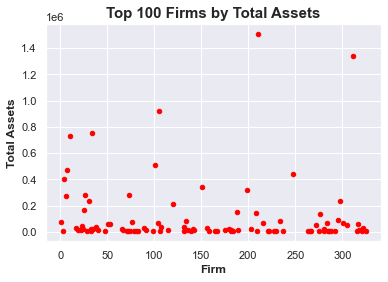

In [103]:
# Factor one - determining biggest 100 firms by asset size
# The total asset size for the five year period is calculated in excel, saved in a new sheet (Top-100), and sorted in descending order (highest to lowest).
assets = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\Data for technical assessment.xlsx', sheet_name='Top-100', nrows=101) #  top 100 firms accoriding to assets are imported

# The dataframe columns are renamed 
assets.columns = ['Firm', '2016', '2017', '2018', '2019', '2020', 'Total Assets']
assets =assets.drop([0], axis=0)
#print(assets)


assets.plot(kind='scatter', x= 'Firm', y='Total Assets', color='red', s=20)  # visualizing the data
plt.xlabel('Firm', fontsize=12, fontweight='bold')
plt.ylabel('Total Assets', fontsize=12, fontweight='bold')
plt.title('Top 100 Firms by Total Assets', fontsize=15, fontweight='bold')
plt.show()
# You will notice firms 210 and 311 are the top 100 firms according to assets evidently by the graph and are outliers


In [104]:
# Factor 2 - determining if business is growing or not based on NWP
# if NWP rises over time, it suggests that the business is growing.(attach link reference) and could indicate more policyholders.
# The NWP for the top 100 firms is filtered out and saved in a new sheet (NWP)
NWP = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\Data for technical assessment.xlsx', sheet_name='NWP',nrows=100) # NWP for top 100 firms is imported
NWP.columns = ['Firm', '2016', '2017', '2018', '2019', '2020'] # the dataframe columns are renamed
print(NWP) # print the NWP dataframe




        Firm          2016          2017          2018          2019  \
0     Firm 1 -13779.815629      0.000000      0.000000      0.000000   
1     Firm 2     28.178059     26.865049     25.064438     23.226445   
2     Firm 3      0.000000     75.609681     70.578732     78.432782   
3     Firm 4  22344.199923  23963.910709  25760.390158  25512.748836   
4     Firm 5     68.200993     51.663132     44.010833     42.008556   
..       ...           ...           ...           ...           ...   
95   Firm 96     -0.010365      0.004387      0.000000      0.000000   
96   Firm 97      6.998085      6.698226      5.306222      6.581324   
97   Firm 98      0.000000      0.000000      0.000000      0.000000   
98   Firm 99    169.171942    157.464789    165.576711    175.477187   
99  Firm 100     21.846483     27.954678     28.695447     31.717111   

            2020  
0       0.000000  
1      21.718558  
2      85.735830  
3   24996.021042  
4      81.273653  
..           ...  
95

    2016          2017         2018        2019        2020
0    NaN  13779.815629     0.000000    0.000000    0.000000
1    NaN     -1.313009    -1.800612   -1.837993   -1.507887
2    NaN     75.609681    -5.030949    7.854050    7.303048
3    NaN   1619.710786  1796.479448 -247.641321 -516.727794
4    NaN    -16.537862    -7.652298   -2.002278   39.265097
..   ...           ...          ...         ...         ...
95   NaN      0.014752    -0.004387    0.000000    0.000000
96   NaN     -0.299858    -1.392005    1.275103    2.303009
97   NaN      0.000000     0.000000    0.000000    0.000000
98   NaN    -11.707153     8.111922    9.900476   -5.119933
99   NaN      6.108195     0.740769    3.021665    0.924146

[100 rows x 5 columns]


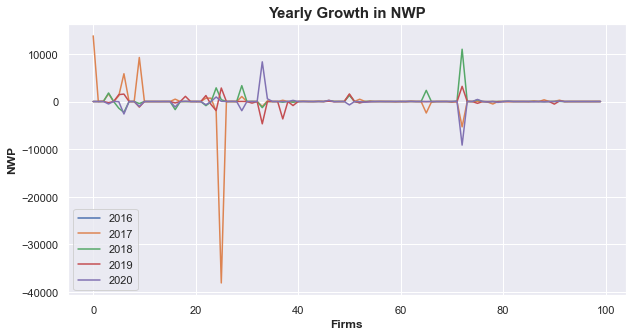

In [105]:
# A new dataframe is created which would store the measured subtansial growth for each firm
Growing_NWP = NWP.loc[:, ['Firm']] # fimr names are included in the dataframe


# caluclating the difference between the NWP values for each year to determine substantial change/growth
NWP_diff =  NWP.iloc[0:,1:].diff(axis=1)   # find the difference between the years

print(NWP_diff) # print the difference between the years, there would no values in year 2016 as it is the first year

# plotting the differeces between the NWP values for each year

plt.show()
NWP_diff.plot(kind='line', figsize=(10,5))
plt.title('Yearly Growth in NWP', fontsize=15, fontweight='bold')
plt.xlabel('Firms', fontsize=12, fontweight='bold')
plt.ylabel('NWP', fontsize=12, fontweight='bold')
plt.show() # to show Net Written Premium changes over the years for each firm
# the peaks generally show where a firm had significant growth, and troughs where it had significant decline

        Firm  Total Growth
0     Firm 1  13779.815629
1     Firm 2     -6.459500
2     Firm 3     85.735830
3     Firm 4   2651.821119
4     Firm 5     13.072659
..       ...           ...
95   Firm 96      0.010365
96   Firm 97      1.886248
97   Firm 98      0.000000
98   Firm 99      1.185312
99  Firm 100     10.794774

[100 rows x 2 columns]


Text(0.5, 1.0, 'Total Growth in NWP')

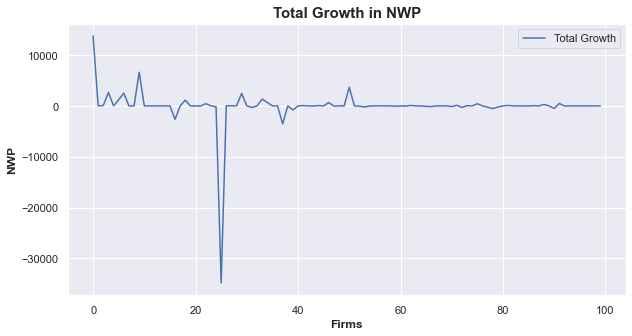

In [106]:
# addition of changes in NWP over the years to determine top 50 firms with subatantial growth
# This diffeerence is summed and positive values indicate substantial growth while zero or negative values indicates dont
NWP_diff['Total'] = NWP_diff.sum(axis=1) # sum the differences in NWP over the years

Growing_NWP['Total Growth'] = NWP_diff['Total'] # adding this total to the growing NWP dataframe
print(Growing_NWP)
# ploting the cumulated growth of NWP over the years
Growing_NWP.plot(kind='line', figsize=(10,5))
plt.xlabel('Firms', fontsize=12, fontweight='bold')
plt.ylabel('NWP', fontsize=12, fontweight='bold')
plt.title('Total Growth in NWP', fontsize=15, fontweight='bold')
# the Peaks and troughs show growth and decline however, very high peaks and troughs are likely errors (due to missing values) such as firm one




In [107]:
# I save the dataframe to an excel file for further analysis (sorting from highest to lowest NWP growth))
writer = pd.ExcelWriter('MLData.xlsx')
Growing_NWP.to_excel(writer, 'NWP Growth') # NWP growth is saved in a new sheet called NWP Growth
writer.save()


In [108]:
# Factor 3 - determinmg outliers from the norm looking at a single year period (2020)
# In the NWP growth analysis sheet, the firms with positive growth (40) are selected to meet factor 2 whilst the firms with zero values are highlighted as missing values
# 40 firms are selected and they all meet PRA requirement of SCR coverage ratio greater than 1 for the year 2020
# The 40 firms are sorted in ascending order of SCR coverage ratio and the two firms with no SCR coverage ratio are highlighted and dropped leaving only 39 firms

Top_39_2020 = pd.read_excel(r'C:\Users\tobio\OneDrive\Bank of England\Analysis.xlsx', sheet_name='2020 analysis')
Top_39_2020 = Top_39_2020.drop([0,1], axis=0) # dropping firt two rows as they contain firms 1 and 96 with missing values
Top_39_2020.columns = ['Type','Firm', 'NWP', 'SCR Coverage Ratio', 'GWP', 'Assets', 'Equity', 'Gross Claims Incurred', 'Net Combined ratio'] # rename the columns

print(Top_39_2020)

    Type  Firm           NWP  SCR Coverage Ratio           GWP         Assets  \
2   Firm   100     32.641257            1.077108     32.874314     274.110203   
3   Firm    21      0.018058            1.154994      0.000000      74.847084   
4   Firm     3     85.735830            1.298726     96.416626    1754.979053   
5   Firm    45     88.038445            1.305374    422.175538     587.736394   
6   Firm    28     53.123331            1.323878     53.096509     633.863365   
7   Firm    19   1143.960077            1.333444   2167.815959    6542.888525   
8   Firm    15      9.989151            1.372664     10.047257      28.062158   
9   Firm    99    170.357254            1.378122    451.529806    1215.246388   
10  Firm     6   3041.876078            1.398558   4452.508624   64743.030240   
11  Firm     4  24996.021040            1.414507  34922.702550   94065.081030   
12  Firm    10   7893.064120            1.421303   7923.371752  142144.987100   
13  Firm    34   8145.617320

Text(0.5, 1.0, 'Assets for year 2020')

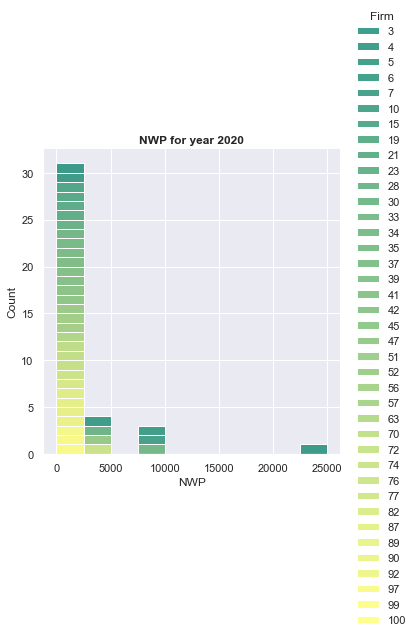

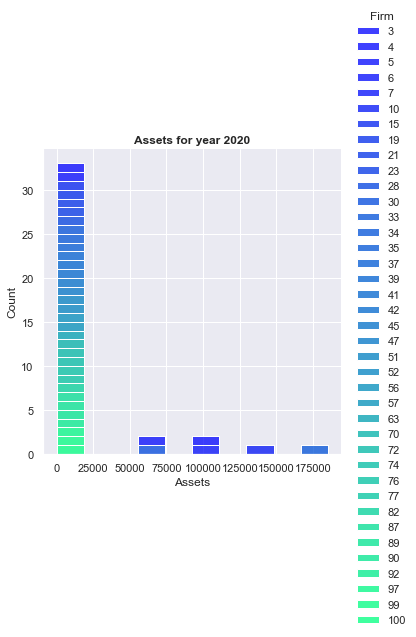

In [109]:
sns.displot(Top_39_2020, x = Top_39_2020['NWP'], hue = Top_39_2020.Firm, multiple = "stack", bins = 10, label='NWP',  palette = 'summer') # visualizing the NWP data for the top 39 firms
plt.title('NWP for year 2020', fontsize=12, fontweight='bold')
sns.displot(Top_39_2020, x = Top_39_2020['Assets'],  hue = Top_39_2020.Firm, multiple = "stack", bins = 10, label='Assets',  palette = 'winter') # visualizing the assets data for the top 39 firms
plt.title('Assets for year 2020', fontsize=12, fontweight='bold') 
# we can see from the plots that most firms fall within a certain range of NWP and assets, thereforr errors or outliers exists as there are firms in further ranges

Text(0.5, 1.0, 'KDE plot of Assets for year 2020')

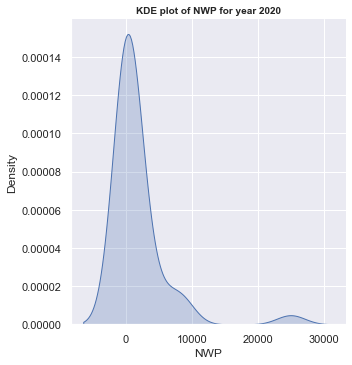

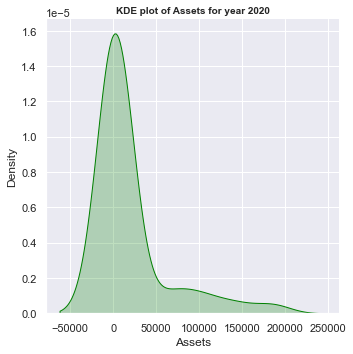

In [110]:
sns.displot(Top_39_2020, x = Top_39_2020['NWP'], kind = "kde", fill= True, label='NWP')
plt.title('KDE plot of NWP for year 2020', fontsize=10, fontweight='bold')
sns.displot(Top_39_2020, x = Top_39_2020['Assets'],  color='green', kind = "kde", fill= True, label='Assets')
plt.title('KDE plot of Assets for year 2020', fontsize=10, fontweight='bold')
# This kde plots mean the same as the previous plots, as the data is skewed to the left but possible outliers/errors are still present

In [111]:
# To identify outliers and errors, the standard deviation, meand and finally z score is calculated for each data set
mean_NWP = statistics.mean(Top_39_2020['NWP'])
sd_NWP = statistics.stdev(Top_39_2020['NWP'])

mean_Assets = statistics.mean(Top_39_2020['Assets'])
sd_Assets = statistics.stdev(Top_39_2020['Assets'])
print(mean_Assets) # for validation in excel


# creating a new dataframe called priority and calculating the z-score to identify outliers both for NWP and Assets
Top_39_2020['NWP_Z'] = (Top_39_2020['NWP'] - mean_NWP)/sd_NWP # NWP z-score
Top_39_2020['Assets_Z'] = (Top_39_2020['Assets'] - mean_Assets)/sd_Assets # Assets z-score

# Creating "Prirotiy" dataframe
Priority = Top_39_2020.loc[:, ['Firm', 'NWP_Z', 'Assets_Z']] # adding the NWP and Assets z-score to the Priority dataframe
Priority["Total_Z"] = Priority["NWP_Z"] + Priority["Assets_Z"] # summing the NWP and Assets z-score to create a total z-score
print(Priority)


# if the Z-score is greater than 1, it is taken as an outlier.
#sns.set_theme(style="darkgrid")
#fig = plt.figure(figsize=(15,5))
#ax = sns.boxplot(x=Priority["Firm"], y=Priority["NWP_Z"], color=".30")
#ax = sns.swarmplot(x=Priority["Firm"],y=Priority["NWP_Z"], color=".25")
#ax.grid()
# as shown in the boxplot, firms like firm 4 are clearly outliers 



#sns.set_theme(style="darkgrid")
#fig = plt.figure(figsize=(15,5))
#ax = sns.boxplot(x=Priority["Firm"], y=Priority["Assets_Z"], palette="autumn")
#ax = sns.swarmplot(x=Priority["Firm"],y=Priority["Assets_Z"], color=".25")
#ax.grid()


19094.024175017
    Firm     NWP_Z  Assets_Z   Total_Z
2    100 -0.402442 -0.433994 -0.836436
3     21 -0.409764 -0.438589 -0.848353
4      3 -0.390526 -0.399845 -0.790371
5     45 -0.390009 -0.426762 -0.816771
6     28 -0.397846 -0.425698 -0.823543
7     19 -0.153025 -0.289434 -0.442459
8     15 -0.407526 -0.439668 -0.847194
9     99 -0.371534 -0.412291 -0.783825
10     6  0.272931  1.052682  1.325613
11     4  5.200180  1.728859  6.929039
12    10  1.361701  2.837599  4.199300
13    34  1.418382  3.828349  5.246731
14    76  0.182404 -0.016876  0.165527
15     7  1.466476  2.104895  3.571371
16    97 -0.407774 -0.438556 -0.846330
17    30  0.699961  1.210398  1.910359
18    42 -0.396169 -0.425048 -0.821217
19    63 -0.388393 -0.432873 -0.821266
20    77 -0.409656 -0.439792 -0.849448
21    87 -0.332876 -0.434890 -0.767766
22    35 -0.212869 -0.324091 -0.536960
23    90 -0.409768 -0.436300 -0.846068
24    57 -0.402753 -0.437926 -0.840679
25    70 -0.405148 -0.438267 -0.843415
26    82 

    Firm     NWP_Z  Assets_Z   Total_Z      Priority
2    100 -0.402442 -0.433994 -0.836436      Priority
3     21 -0.409764 -0.438589 -0.848353      Priority
4      3 -0.390526 -0.399845 -0.790371      Priority
5     45 -0.390009 -0.426762 -0.816771      Priority
6     28 -0.397846 -0.425698 -0.823543      Priority
7     19 -0.153025 -0.289434 -0.442459      Priority
8     15 -0.407526 -0.439668 -0.847194      Priority
9     99 -0.371534 -0.412291 -0.783825      Priority
10     6  0.272931  1.052682  1.325613      Priority
11     4  5.200180  1.728859  6.929039  Non-Priority
12    10  1.361701  2.837599  4.199300  Non-Priority
13    34  1.418382  3.828349  5.246731  Non-Priority
14    76  0.182404 -0.016876  0.165527      Priority
15     7  1.466476  2.104895  3.571371  Non-Priority
16    97 -0.407774 -0.438556 -0.846330      Priority
17    30  0.699961  1.210398  1.910359      Priority
18    42 -0.396169 -0.425048 -0.821217      Priority
19    63 -0.388393 -0.432873 -0.821266      Pr

Text(0.5, 1.0, 'Priority for year 2020')

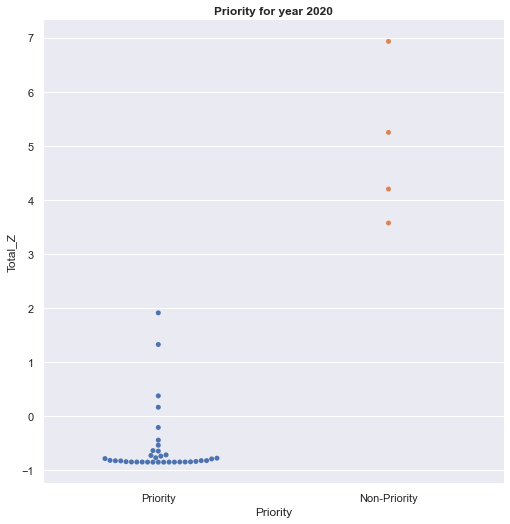

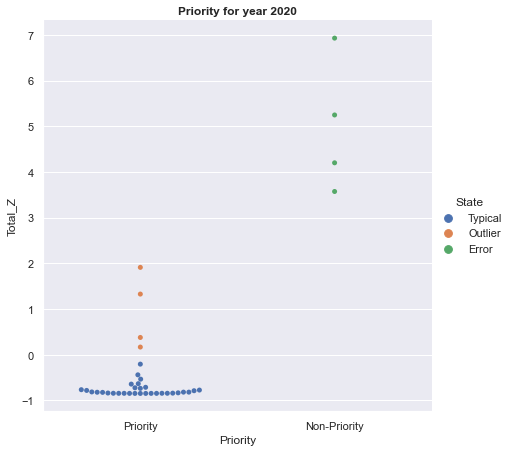

In [112]:
# The firms that that havea tz_score greater than one both in NWP and Assets are selected as non-priority firms
# The remaining firms are selected as priortity firms
Priority["Priority"] = Priority.apply(lambda row: "Non-Priority" if row["NWP_Z"] > 1 and row["Assets_Z"] > 1 else "Priority", axis=1)
print(Priority)


sns.catplot(x="Priority", y="Total_Z", data=Priority, hue="Priority", kind="swarm", height=7) # visualizing the priority data for obervation
# adding a title to the plot
plt.title('Priority for year 2020', fontsize=12, fontweight='bold')
# In the plot below, the points below y = 2, colored blue above the bowl like ponts seem to be genuine outliers while the orange points seem to be errors
# Therefore from the chat, if the total z-score is greater than 2, it is taken as an error.

# creating a method for condition to meey this outlier analysis
def condition(row):
    if row["Total_Z"] >= 2:
        return "Error"
    elif row["Total_Z"] < 2:
        if row["Total_Z"] > 0:
            return "Outlier"
        else:
            return "Typical"
Priority["State"] = Priority.apply(condition, axis=1) # adding a new column to the Priority dataframe called State
print(Priority)
sns.catplot(x="Priority", y="Total_Z", data=Priority, hue="State", kind="swarm", height=6)
plt.title('Priority for year 2020', fontsize=12, fontweight='bold')
# The second plot now shows points that are errors and those that are genuine outliers

In [113]:
Priority_final = Priority.loc[Priority["State"] != "Error", :] # creating a new dataframe called Priority_final
N =  Priority_final["Firm"].count() # counting the number of firms in the priority dataframe
# printin the number of firms in the priority dataframe
print("The number of firms in the priority dataframe is: ", N)

# There are 35 firms in the final priority list
# They should be selected for the supervision team to focus on.
# They are exported to the priority sheet in the priority final excel file.

# Loading the final priority dataframe into a csv file 
#Priority_final.to_csv(r'C:\Users\tobio\OneDrive\Bank of England\Priority_final.csv', index=False)
#csv file was converted to excel file

The number of firms in the priority dataframe is:  35
